In [8]:
from build import build_discriminator, build_generator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
LATENT_SIZE = 100

## build model and load weights

In [3]:
discriminator_weights_path = './log/params_discriminator_epoch_499.hdf5'
generator_weights_path = './log/params_generator_epoch_499.hdf5'

they are trained with fashion_mnist

In [4]:
discriminator = build_discriminator()
generator = build_generator(latent_size=LATENT_SIZE)

/Users/abe/Workspace/Practice/DeepLearning/GAN/dcgan/build.py:73: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("di..., outputs=Tensor("di...)`
  model = Model(input=discriminator_image, output=discriminator_sigmoid1)
/Users/abe/Workspace/Practice/DeepLearning/GAN/dcgan/build.py:37: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("ge..., outputs=Tensor("ge...)`
  model = Model(input=generator_latent, output=generator_tanh1)


In [5]:
discriminator.load_weights(discriminator_weights_path)
generator.load_weights(generator_weights_path)

## generate 100 images from uniform noise and show them

In [17]:
noise = np.random.uniform(-1, 1, size=(100, LATENT_SIZE))
generated_images = generator.predict(noise, verbose=False)

In [18]:
img = (np.concatenate([r.reshape(-1, 28) for r in np.split(generated_images, 10)], axis=-1) * 127.5 + 127.5).astype(np.uint8)
img = np.clip(img, 0, 255)

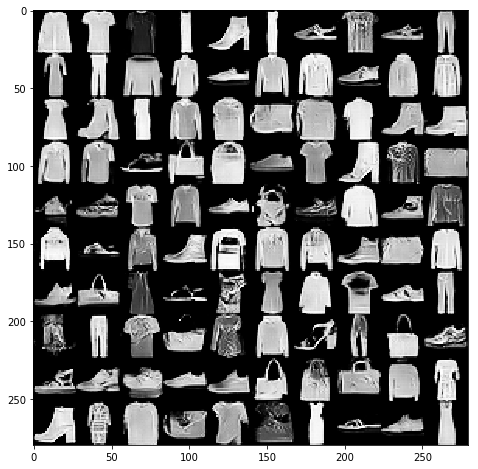

In [19]:
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.gray()
plt.show()